**OLD extractd Features**




In [ ]:
import librosa
import numpy as np
import math

# Load a single audio file
file_path ="/content/LA_D_1024892.flac"
y, sr = librosa.load(file_path, sr=None)

# Extract Features
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
power = np.log1p(spectrogram)
rms = np.sqrt(np.mean(power**2, axis=0))

# Calculate Band Energy Ratio
def calculate_band_energy_ratio(audio_signal, sr, start_freq, end_freq):
    D = librosa.stft(audio_signal)
    power_spectrogram = np.abs(D)**2
    frequencies = librosa.fft_frequencies(sr=sr)
    start_index = np.argmax(frequencies >= start_freq)
    end_index = np.argmax(frequencies >= end_freq)
    band_energy = np.sum(power_spectrogram[start_index:end_index, :])
    total_energy = np.sum(power_spectrogram)
    return band_energy / total_energy

band_energy_ratio = calculate_band_energy_ratio(y, sr, start_freq=250, end_freq=1000)

# Compute Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

# Compute Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

# Padding (if needed)
target_length = max(len(spectrogram), len(power), len(rms), len(spectral_rolloff), len(spectral_centroid), len(mfccs))
def pad_array(array, target_length):
    if array.shape[1] < target_length:
        pad_width = ((0, 0), (0, target_length - array.shape[1]))
        return np.pad(array, pad_width, mode='constant', constant_values=0)
    return array[:, :target_length]

spectrogram = pad_array(spectrogram, target_length)
power = pad_array(power, target_length)
rms = pad_array(rms[np.newaxis, :], target_length)
spectral_rolloff = pad_array(spectral_rolloff, target_length)
spectral_centroid = pad_array(spectral_centroid, target_length)
mfccs = pad_array(mfccs, target_length)

# Print results
print("Spectrogram Shape:", spectrogram.shape)
print("Power Shape:", power.shape)
print("RMS Energy Shape:", rms.shape)
print("Band Energy Ratio:", band_energy_ratio)
print("Spectral Rolloff Shape:", spectral_rolloff.shape)
print("Spectral Centroid Shape:", spectral_centroid.shape)
print("MFCCs Shape:", mfccs.shape)

import pandas as pd

# Create a dictionary for a single row
data = {
    "File Name": [file_path],
    "Spectrogram": [spectrogram.flatten()],  # Flatten to store in a single row
    "Power": [power.flatten()],
    "RMS Energy": [rms.flatten()],
    "Band Energy Ratio": [band_energy_ratio],
    "Spectral Rolloff": [spectral_rolloff.flatten()],
    "Spectral Centroid": [spectral_centroid.flatten()],
    "MFCCs": [mfccs.flatten()]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Show the first row
print(df.head())



Spectrogram Shape: (128, 302)
Power Shape: (128, 302)
RMS Energy Shape: (1, 302)
Band Energy Ratio: 0.63394845
Spectral Rolloff Shape: (1, 302)
Spectral Centroid Shape: (1, 302)
MFCCs Shape: (40, 302)
                    File Name  \
0  /content/LA_D_1024892.flac   

                                         Spectrogram  \
0  [0.0008524989, 0.00022517482, 1.3039543e-07, 5...   

                                               Power  \
0  [0.00085213577, 0.00022514947, 1.3039542e-07, ...   

                                          RMS Energy  Band Energy Ratio  \
0  [0.0010443698, 0.0011698157, 0.0010558724, 0.0...           0.633948   

                                    Spectral Rolloff  \
0  [4694.23828125, 4737.3046875, 4974.169921875, ...   

                                   Spectral Centroid  \
0  [1869.6107446882534, 1983.5007572881798, 2178....   

                                               MFCCs  
0  [-502.91434, -495.43713, -482.79227, -458.8013...  


# FEATURE PLOTS (General)



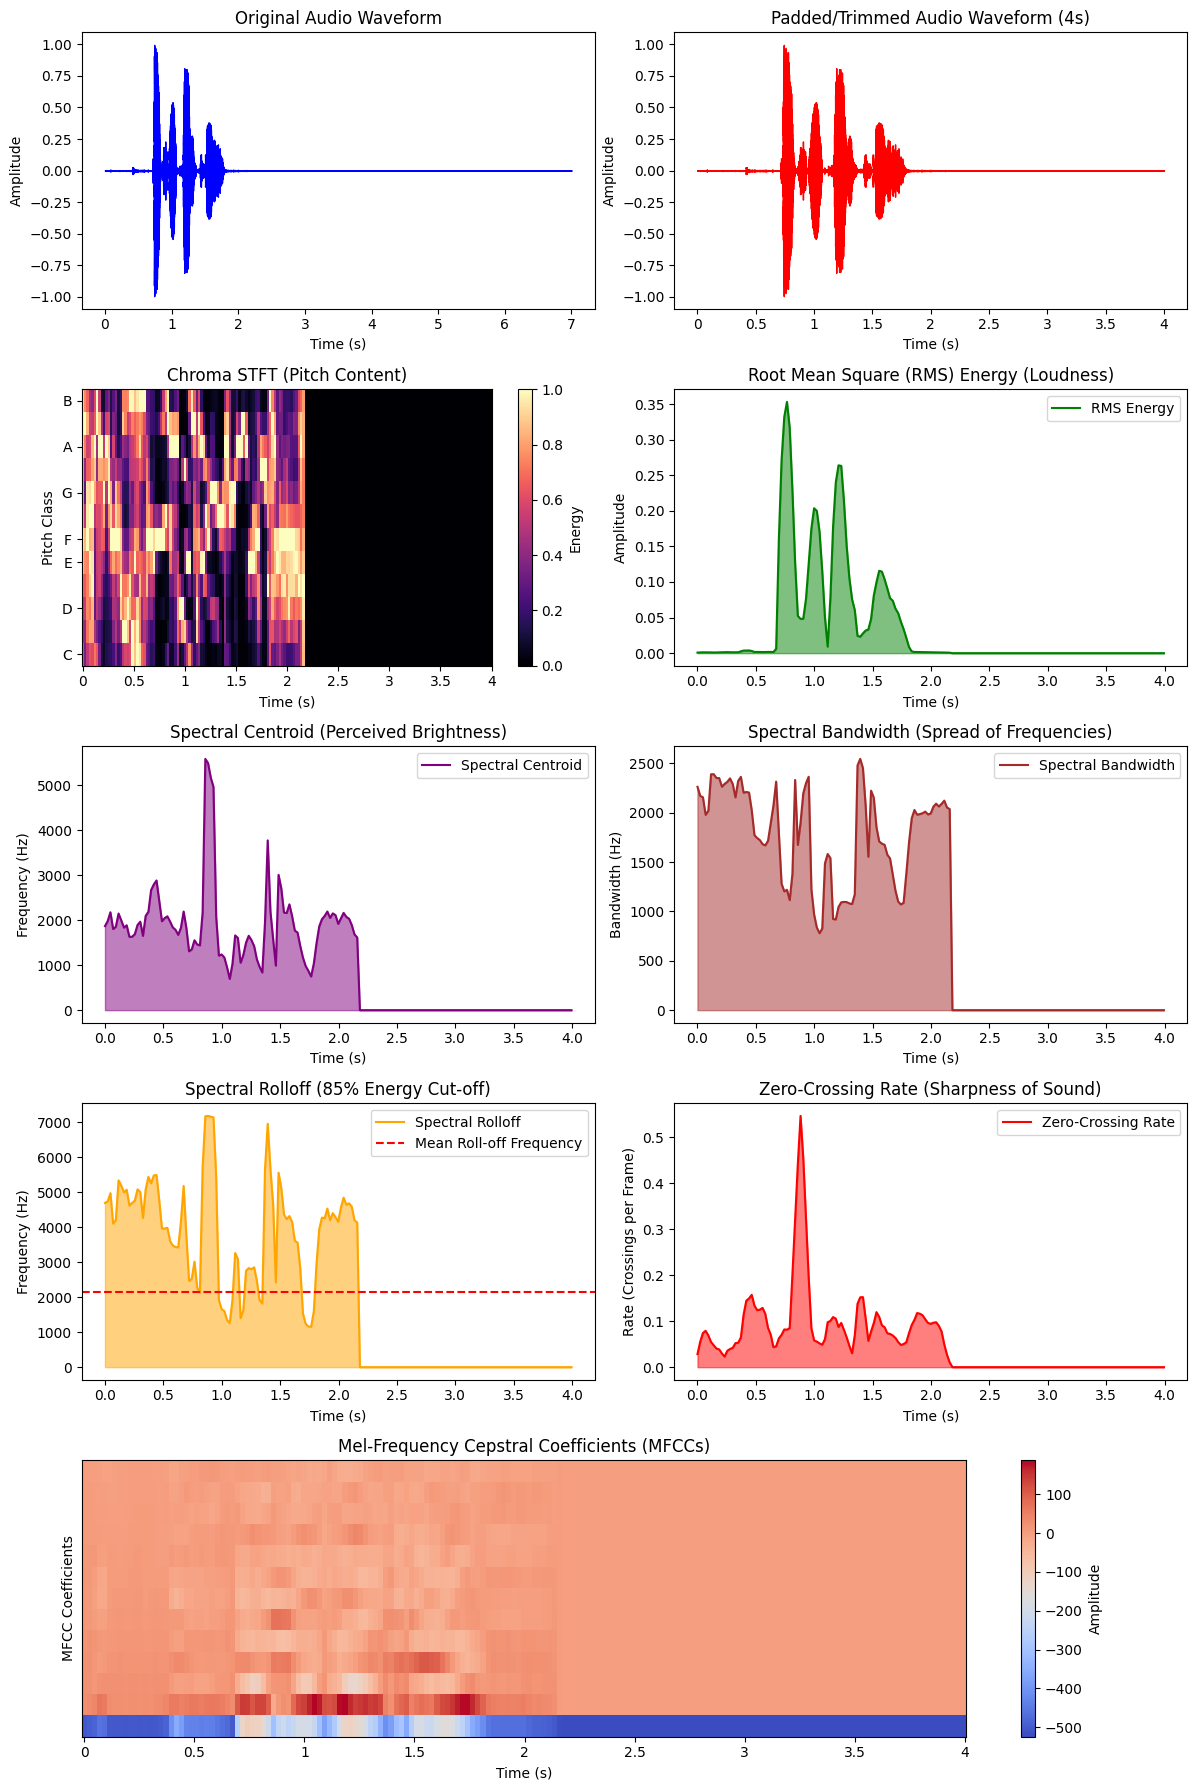

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load an audio file
file_path = "/content/LA_D_1024892.flac"  # Replace with your audio file
y, sr = librosa.load(file_path, sr=None)  # Load at native sampling rate

# Store original waveform
original_y = y.copy()

# Pad or truncate audio to 4 seconds
fixed_duration = 4  # seconds
target_length = sr * fixed_duration

if len(y) > target_length:
    y = y[:target_length]  # Truncate if too long
else:
    y = np.pad(y, (0, max(0, target_length - len(y))), mode='constant')  # Pad with zeros

# Extract Features
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
rms = librosa.feature.rms(y=y)
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Using 13 MFCCs

# Time axis for plotting
frames = range(len(rms[0]))
time = librosa.frames_to_time(frames, sr=sr)

# Plot all features
plt.figure(figsize=(12, 18))

# 1. Original vs Padded Audio Waveform
plt.subplot(5, 2, 1)
librosa.display.waveshow(original_y, sr=sr, color="blue")
plt.title("Original Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(5, 2, 2)
librosa.display.waveshow(y, sr=sr, color="red")
plt.title("Padded/Trimmed Audio Waveform (4s)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# 2. Chroma STFT
plt.subplot(5, 2, 3)
librosa.display.specshow(chroma_stft, y_axis="chroma", x_axis="time", sr=sr)
plt.colorbar(label="Energy")
plt.title("Chroma STFT (Pitch Content)")
plt.xlabel("Time (s)")
plt.ylabel("Pitch Class")

# 3. RMS Energy
plt.subplot(5, 2, 4)
plt.plot(time, rms[0], label="RMS Energy", color="green")
plt.fill_between(time, rms[0], alpha=0.5, color="green")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Root Mean Square (RMS) Energy (Loudness)")
plt.legend()

# 4. Spectral Centroid
plt.subplot(5, 2, 5)
plt.plot(time, spectral_centroid[0], label="Spectral Centroid", color="purple")
plt.fill_between(time, spectral_centroid[0], alpha=0.5, color="purple")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectral Centroid (Perceived Brightness)")
plt.legend()

# 5. Spectral Bandwidth
plt.subplot(5, 2, 6)
plt.plot(time, spectral_bandwidth[0], label="Spectral Bandwidth", color="brown")
plt.fill_between(time, spectral_bandwidth[0], alpha=0.5, color="brown")
plt.xlabel("Time (s)")
plt.ylabel("Bandwidth (Hz)")
plt.title("Spectral Bandwidth (Spread of Frequencies)")
plt.legend()

# 6. Spectral Rolloff
plt.subplot(5, 2, 7)
plt.plot(time, rolloff[0], label="Spectral Rolloff", color="orange")
plt.fill_between(time, rolloff[0], alpha=0.5, color="orange")
plt.axhline(y=np.mean(rolloff[0]), color="red", linestyle="--", label="Mean Roll-off Frequency")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectral Rolloff (85% Energy Cut-off)")
plt.legend()

# 7. Zero-Crossing Rate
plt.subplot(5, 2, 8)
plt.plot(time, zero_crossing_rate[0], label="Zero-Crossing Rate", color="red")
plt.fill_between(time, zero_crossing_rate[0], alpha=0.5, color="red")
plt.xlabel("Time (s)")
plt.ylabel("Rate (Crossings per Frame)")
plt.title("Zero-Crossing Rate (Sharpness of Sound)")
plt.legend()

# 8. MFCCs (Mel-Frequency Cepstral Coefficients)
plt.subplot(5, 2, (9, 10))
librosa.display.specshow(mfccs, x_axis="time", sr=sr, cmap="coolwarm")
plt.colorbar(label="Amplitude")
plt.title("Mel-Frequency Cepstral Coefficients (MFCCs)")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")

plt.tight_layout()
plt.show()


# FEATURE Plots(Detailed)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


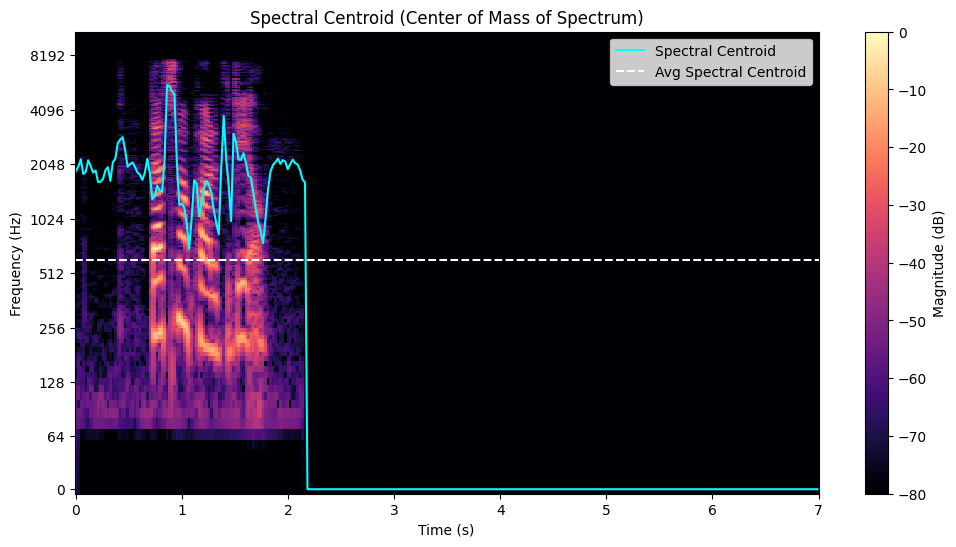

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
audio_path = '/content/LA_D_1024892.flac'  # Replace with your file path
y, sr = librosa.load(audio_path)

# Compute Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# Convert frames to time for plotting
frames = range(len(spectral_centroid[0]))
time = librosa.frames_to_time(frames, sr=sr)

# Compute the average spectral centroid (center of mass in frequency domain)
avg_centroid_freq = np.mean(spectral_centroid)

# Plot the spectrogram
plt.figure(figsize=(12, 6))
S = np.abs(librosa.stft(y))  # Compute STFT magnitude
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='log', cmap='magma')

# Plot Spectral Centroid over time
plt.plot(time, spectral_centroid[0], color='cyan', label='Spectral Centroid')

# Draw a horizontal line at the average spectral centroid frequency
plt.axhline(y=avg_centroid_freq, color='white', linestyle='--', label='Avg Spectral Centroid')

# Labels and title
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Centroid (Center of Mass of Spectrum)')
plt.legend()
plt.colorbar(label='Magnitude (dB)')
plt.show()


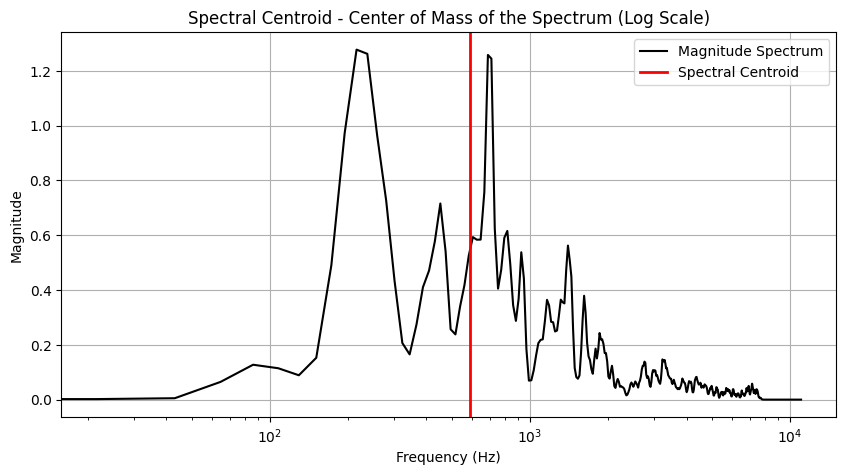

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio
audio_path = "/content/LA_D_1024892.flac"  # Replace with your file
y, sr = librosa.load(audio_path)

# Compute magnitude spectrum
n_fft = 1024  # Smaller FFT size for better frequency resolution
magnitude_spectrum = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=512))
frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

# Compute Spectral Centroid (use a middle frame to avoid bias)
spectral_centroid = librosa.feature.spectral_centroid(S=magnitude_spectrum, sr=sr)
centroid_freq = np.mean(spectral_centroid)  # Average across time

# Plot magnitude spectrum (averaged across time)
plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.mean(magnitude_spectrum, axis=1), color='black', label="Magnitude Spectrum")

# Draw a vertical line at the Spectral Centroid
plt.axvline(x=centroid_freq, color='red', linestyle='-', linewidth=2, label="Spectral Centroid")

# Apply logarithmic frequency scale for better visualization
plt.xscale('log')

# Labels & Title
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Spectral Centroid - Center of Mass of the Spectrum (Log Scale)")
plt.legend()
plt.grid()
plt.show()


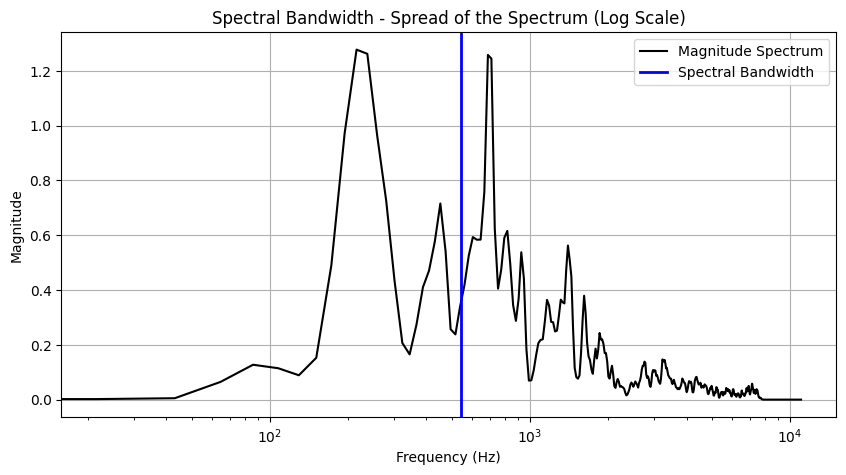

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load an audio file
audio_path = "/content/LA_D_1024892.flac"  # Replace with your file
y, sr = librosa.load(audio_path)

# Compute the magnitude spectrum
n_fft = 1024  # FFT size for frequency resolution
magnitude_spectrum = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=512))
frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)

# Compute Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(S=magnitude_spectrum, sr=sr)
avg_bandwidth = np.mean(spectral_bandwidth)  # Average across time

# Plot the magnitude spectrum (averaged across time)
plt.figure(figsize=(10, 5))
plt.plot(frequencies, np.mean(magnitude_spectrum, axis=1), color='black', label="Magnitude Spectrum")

# Draw a vertical line at the Spectral Bandwidth
plt.axvline(x=avg_bandwidth, color='blue', linestyle='-', linewidth=2, label="Spectral Bandwidth")

# Apply logarithmic frequency scale for better visualization
plt.xscale('log')

# Labels & Title
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Spectral Bandwidth - Spread of the Spectrum (Log Scale)")
plt.legend()
plt.grid()
plt.show()


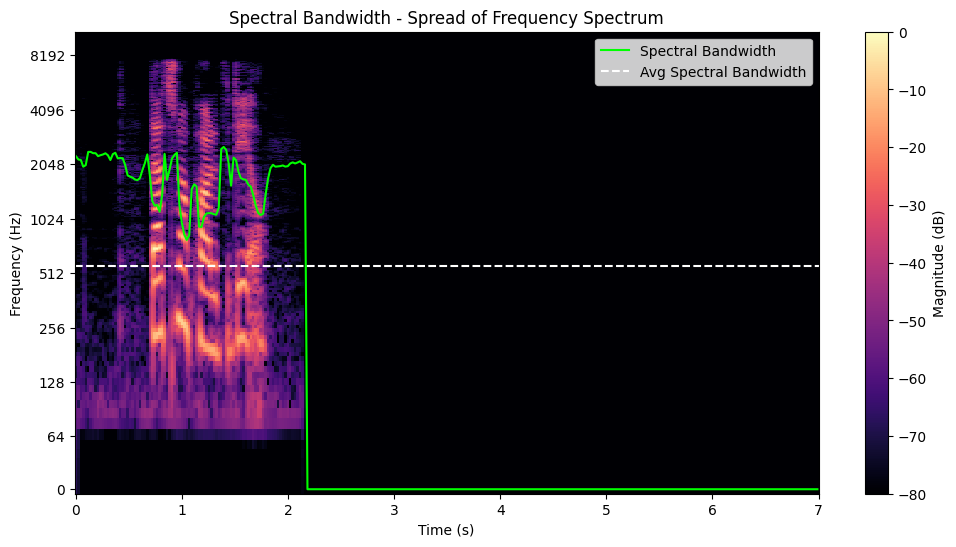

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
audio_path = '/content/LA_D_1024892.flac'  # Replace with your file path
y, sr = librosa.load(audio_path)

# Compute Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

# Convert frames to time for plotting
frames = range(len(spectral_bandwidth[0]))
time = librosa.frames_to_time(frames, sr=sr)

# Compute the average spectral bandwidth
avg_bandwidth_freq = np.mean(spectral_bandwidth)

# Plot the spectrogram
plt.figure(figsize=(12, 6))
S = np.abs(librosa.stft(y))  # Compute STFT magnitude
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='log', cmap='magma')

# Plot Spectral Bandwidth over time
plt.plot(time, spectral_bandwidth[0], color='lime', label='Spectral Bandwidth')

# Draw a horizontal line at the average spectral bandwidth frequency
plt.axhline(y=avg_bandwidth_freq, color='white', linestyle='--', label='Avg Spectral Bandwidth')

# Labels and title
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectral Bandwidth - Spread of Frequency Spectrum')
plt.legend()
plt.colorbar(label='Magnitude (dB)')
plt.show()


**CSV Maker code**

In [ ]:
import librosa
import numpy as np
import pandas as pd
import os

# Fixed duration in seconds
FIXED_DURATION = 4  # 4 seconds

# Function to load, pad/crop, and extract features
def extract_features(file_path, label, fixed_duration=FIXED_DURATION):
    y, sr = librosa.load(file_path, sr=None)  # Load at native sampling rate
    target_length = sr * fixed_duration  # Desired number of samples

    # Crop or pad the audio to exactly 4 seconds
    if len(y) > target_length:
        y = y[:target_length]  # Truncate if too long
    else:
        y = np.pad(y, (0, max(0, target_length - len(y))), mode='constant')  # Pad with zeros

    # Extract features
    features = {
        "chroma_stft": np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
        "rms": np.mean(librosa.feature.rms(y=y)),
        "spectral_centroid": np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        "spectral_bandwidth": np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        "rolloff": np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        "zero_crossing_rate": np.mean(librosa.feature.zero_crossing_rate(y))
    }

    # Extract MFCCs (20 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(20):
        features[f"mfcc{i+1}"] = np.mean(mfccs[i])

    # Add label
    features["LABEL"] = label
    return features

# Path to the main audio directory
audio_dir = "E:\BIJI\DATASET2"
output_file = "extracted_features2_VERIFY.csv"

# Extract features for all audio files
feature_list = []
for category in ["REAL", "FAKE"]:
    category_path = os.path.join(audio_dir, category)
    if os.path.exists(category_path):
        for file_name in os.listdir(category_path):
            if file_name.endswith(".flac"):
                file_path = os.path.join(category_path, file_name)
                feature_list.append(extract_features(file_path, category))
                print(f"Processed: {file_name}")

# Convert to DataFrame
df_features = pd.DataFrame(feature_list)

# Normalize column-wise (excluding LABEL)
numeric_columns = df_features.columns.difference(["LABEL"])
df_features[numeric_columns] = (df_features[numeric_columns] - df_features[numeric_columns].mean()) / df_features[numeric_columns].std()

# Save to CSV
df_features.to_csv(output_file, index=False)

print(f"Features extracted from 4-second audio clips, normalized, and saved to {output_file}")


Features extracted from 4-second audio clips, normalized, and saved to extracted_features2_VERIFY.csv


In [ ]:
import librosa
import numpy as np

# Fixed duration in seconds
FIXED_DURATION = 4  # 4 seconds

def extract_features(file_path, fixed_duration=FIXED_DURATION):
    y, sr = librosa.load(file_path, sr=None)  # Load at native sampling rate
    target_length = sr * fixed_duration  # Desired number of samples

    # Crop or pad the audio
    if len(y) > target_length:
        y_padded = y[:target_length]
    else:
        y_padded = np.pad(y, (0, max(0, target_length - len(y))), mode='constant')

    # Extract features
    features = {
        "chroma_stft": np.mean(librosa.feature.chroma_stft(y=y_padded, sr=sr)),
        "rms": np.mean(librosa.feature.rms(y=y_padded)),
        "spectral_centroid": np.mean(librosa.feature.spectral_centroid(y=y_padded, sr=sr)),
        "spectral_bandwidth": np.mean(librosa.feature.spectral_bandwidth(y=y_padded, sr=sr)),
        "rolloff": np.mean(librosa.feature.spectral_rolloff(y=y_padded, sr=sr)),
        "zero_crossing_rate": np.mean(librosa.feature.zero_crossing_rate(y_padded))
    }

    # Extract MFCCs (20 coefficients)
    mfccs = librosa.feature.mfcc(y=y_padded, sr=sr, n_mfcc=20)
    for i in range(20):
        features[f"mfcc{i+1}"] = np.mean(mfccs[i])

    return features

# File path of the single audio file
file_path = "/content/LA_D_1024892.flac"

# Extract features
features = extract_features(file_path)

# Display extracted features
print("\nExtracted Audio Features:")
for key, value in features.items():
    print(f"{key}: {value}")



Extracted Audio Features:
chroma_stft: 0.2520237863063812
rms: 0.03432033210992813
spectral_centroid: 1052.3156150392447
spectral_bandwidth: 971.5832424485321
rolloff: 2134.7743745484104
zero_crossing_rate: 0.054365742413294796
mfcc1: -429.2364501953125
mfcc2: 43.68100357055664
mfcc3: -5.475940227508545
mfcc4: 12.540112495422363
mfcc5: -3.9062001705169678
mfcc6: 1.1956570148468018
mfcc7: -3.955371379852295
mfcc8: -4.814295291900635
mfcc9: -5.193256378173828
mfcc10: 0.7932985424995422
mfcc11: -1.087206244468689
mfcc12: -1.7758002281188965
mfcc13: -2.6466572284698486
mfcc14: -5.858513355255127
mfcc15: -5.396800994873047
mfcc16: -8.459693908691406
mfcc17: -0.7857129573822021
mfcc18: -4.000570297241211
mfcc19: -4.239480018615723
mfcc20: -4.120205879211426
